### Spatial joins
These address the following kind of scenario<br>

I have a list of points representing cities, and I want to match these points to the relevant polygons representing districts or provinces so that wherever a matching city is found the province will be coloured appropriately.<br>

http://geopandas.org/mergingdata.html<br>

### Import libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

### Import shapefiles
The required shapefiles can be found at https://gadm.org/download_country_v3.html<br>
The shapefiles usually come zipped and contain a *.shp* file as well as *.cpg, .dbf, .prj, .shx* files. 
Copy all of them to your working folder before you start.

In [2]:
# Let's import the .shp file that represents the 52 districts of South Africa
za = gpd.read_file("gadm36_ZAF_2.shp")
za.head(3)

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,ZAF,South Africa,ZAF.1_1,Eastern Cape,None,ZAF.1.1_1,Alfred Nzo,None,None,District Municipality,District Municipality,DC44,ZA.EC.AN,"(POLYGON ((30.1943779 -31.07847214, 30.1943054..."
1,ZAF,South Africa,ZAF.1_1,Eastern Cape,None,ZAF.1.2_1,Amathole,None,None,District Municipality,District Municipality,DC12,ZA.EC.AT,"(POLYGON ((27.48763847 -33.27881241, 27.487699..."
2,ZAF,South Africa,ZAF.1_1,Eastern Cape,None,ZAF.1.3_1,Buffalo City,None,None,District Municipality,District Municipality,BUF,None,"(POLYGON ((27.45833778 -33.28152847, 27.458471..."


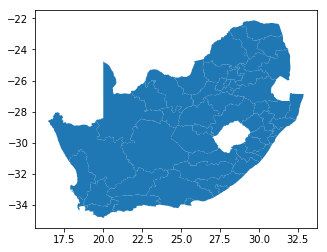

In [3]:
# This is what they look like
za.plot()

### Setup cities of interest

In [4]:
# Here we construct a dataframe which will hold 3 cities and their corresponding latitude and longitude
city = ["Cape Town", "Pretoria", "Bhisho"]
longitude = [18.4240553, 28.2292712, 27.4409557]
latitude = [-33.9248685, -25.7478676, -32.849876]
caps = pd.DataFrame({"City":city, "Longitude":longitude, "Latitude":latitude})

# And the we convert this information to a GeoPandas dataframe with points
geometry = [Point(xy) for xy in zip(caps["Longitude"], caps["Latitude"])]
crs = {'init': 'epsg:4326'}
caps_points = GeoDataFrame(caps["City"], crs=crs, geometry=geometry)
caps_points.head()

,City,geometry
0,Cape Town,POINT (18.4240553 -33.9248685)
1,Pretoria,POINT (28.2292712 -25.7478676)
2,Bhisho,POINT (27.4409557 -32.849876)


### Now let's do the join and view the results

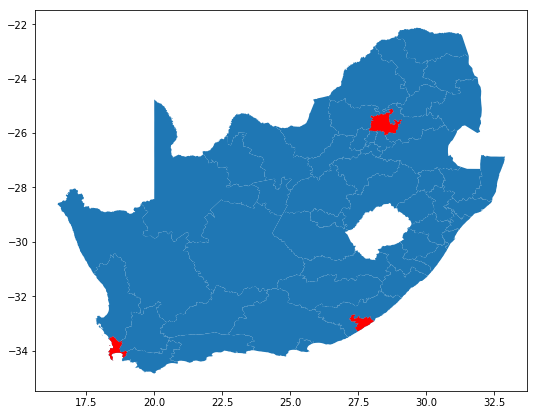

In [6]:
za_with_city = gpd.sjoin(za, caps_points, how="inner", op='intersects')
ax = za.plot(figsize = (10, 7))
za_with_city.plot(ax = ax, color = "red")

In [ ]:
# Voila!